# Modeling Nicotine

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../../data/processed/data_train_model.csv")

In [12]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Nicotine_bin
0,-0.07854,0.48246,-1.22751,0.96082,-0.31685,-0.14882,-0.15487,-1.97495,0.59042,0.75830,-0.71126,-0.84637,4,0,0,0,6,1,6,0,0,0,0,0,0,0,0,0,1,0,0
1,1.09449,0.48246,0.45468,0.96082,-0.31685,-1.32828,-0.15487,-0.84732,0.13136,0.58489,-1.37983,-1.54858,3,0,0,0,6,0,6,0,0,0,0,0,0,0,0,1,4,1,1
2,-0.95197,0.48246,0.45468,-0.57009,-0.31685,-0.58016,1.45421,0.88309,-0.01729,0.12331,0.88113,0.40148,5,3,0,0,6,6,5,3,0,4,0,0,0,3,0,5,5,0,1
3,-0.95197,-0.48246,-0.61113,0.24923,-0.31685,1.98437,0.00332,2.15324,-0.45321,-0.65253,0.88113,0.76540,4,6,0,5,5,6,6,3,0,3,0,5,3,5,0,5,4,0,1
4,1.82213,-0.48246,-0.05921,0.96082,-0.31685,0.62967,-1.50796,-1.55521,0.76096,-0.40581,0.19268,-0.21575,6,0,0,0,6,0,6,0,0,0,0,0,0,0,0,0,0,0,0


## Bin Nicotine in User and non-user

In [11]:
df['Nicotine_bin'] = [1 if nic > 2 else 0 for nic in df.Nicotine.values]
df.Nicotine_bin.value_counts()

1    704
0    553
Name: Nicotine_bin, dtype: int64

## Bin illegal Drugs 2

In [74]:
illegal_drugs2 = ['Meth', 'Benzos', 'Heroin', 'Crack']

In [75]:
for drug in illegal_drugs2:
    df[drug+'_bin'] = [1 if d > 0 else 0 for d in df[drug].values]

In [78]:
df['illegal_drugs_2'] = df['Meth_bin'] + df['Benzos_bin'] + df['Heroin_bin'] + df['Crack_bin']

df['illegal_drugs_2'] = [1 if ill > 0 else 0 for ill in df.illegal_drugs_2.values]

In [79]:
df.illegal_drugs_2.value_counts()

1    647
0    610
Name: illegal_drugs_2, dtype: int64

## Define X and y

In [81]:
X = df.iloc[:,:12]
y_n = df['Nicotine_bin']
y_id2 = df['illegal_drugs_2']

## Create Baseline Model

In [51]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

### Nicotine

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       553
           1       0.75      0.72      0.73       704

    accuracy                           0.71      1257
   macro avg       0.70      0.71      0.71      1257
weighted avg       0.71      0.71      0.71      1257



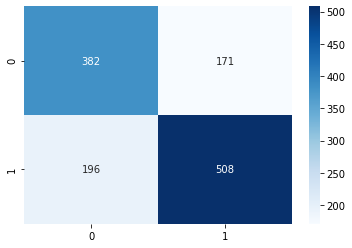

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X, y_n, cv=5)
cm = confusion_matrix(y_n, y_pred)
print(classification_report(y_n, y_pred))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='.0f');

### illegal drugs 2

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X, y_n, cv=5)
cm = confusion_matrix(y_n, y_pred)
print(classification_report(y_n, y_pred))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='.0f');

## SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

## Models
* Decision Tree
* Random Forest
* knn
* logreg
* SVM

### Decision Tree

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       553
           1       0.71      0.69      0.70       704

    accuracy                           0.67      1257
   macro avg       0.67      0.67      0.67      1257
weighted avg       0.67      0.67      0.67      1257



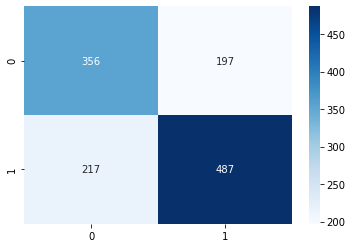

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
y_pred = cross_val_predict(dtree, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='.0f');

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rnc = RandomForestClassifier(n_estimators = 200, random_state=10, class_weight="balanced")
y_pred = cross_val_predict(rnc, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       704
           1       0.73      0.74      0.73       704

    accuracy                           0.73      1408
   macro avg       0.73      0.73      0.73      1408
weighted avg       0.73      0.73      0.73      1408

[[507 197]
 [183 521]]


### Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, solver="liblinear")
y_pred = cross_val_predict(logreg, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       704
           1       0.72      0.70      0.71       704

    accuracy                           0.71      1408
   macro avg       0.71      0.71      0.71      1408
weighted avg       0.71      0.71      0.71      1408

[[514 190]
 [213 491]]


### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
y_pred = cross_val_predict(knn, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       704
           1       0.74      0.56      0.64       704

    accuracy                           0.68      1408
   macro avg       0.69      0.68      0.68      1408
weighted avg       0.69      0.68      0.68      1408

[[567 137]
 [312 392]]


### SVM

In [48]:
from sklearn import svm
svm = svm.SVC(kernel='rbf')
y_pred = cross_val_predict(svm, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       704
           1       0.71      0.72      0.71       704

    accuracy                           0.71      1408
   macro avg       0.71      0.71      0.71      1408
weighted avg       0.71      0.71      0.71      1408

[[496 208]
 [199 505]]


## Ensemble Methods
* Adaboost
* XGboost

### XGboost

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
y_pred = cross_val_predict(xgb, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       704
           1       0.71      0.72      0.71       704

    accuracy                           0.71      1408
   macro avg       0.71      0.71      0.71      1408
weighted avg       0.71      0.71      0.71      1408

[[493 211]
 [199 505]]


### Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
y_pred = cross_val_predict(ada, X_smote, y_smote, cv=5)
cm = confusion_matrix(y_smote, y_pred)
print(classification_report(y_smote, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       704
           1       0.71      0.68      0.69       704

    accuracy                           0.70      1408
   macro avg       0.70      0.70      0.70      1408
weighted avg       0.70      0.70      0.70      1408

[[504 200]
 [223 481]]


# Grid Search
* Random Forest
* ensemble Methods
* logreg

### GridSearch Adaboost

In [ ]:
from sklearn.model_selection import GridSearchCV